# Score matching for 1D Gassian distribution

* [Denoising Score Matching](https://johfischer.com/2022/09/18/denoising-score-matching/)

In [1]:
import torch
print('torch version = ', torch.__version__)
import torch.nn as nn

torch version =  2.0.1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from random import sample

device = torch.device('cpu')
#device = torch.device('cuda')
print('device= ', device)

device=  cpu


In [3]:
import learn_1D_gaussian_tools
from learn_1D_gaussian_tools import *

## Example 1 - 1D Gaussian distribution

* probability density function:
$$
p(X) = N(\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}\text{exp}\left(-\frac{|X-\mu|^2}{2\sigma^2}\right)
$$
* score function
$$
s(X) = \nabla_X \log p(X) = -\frac{X-\mu}{\sigma^2}
$$

### Explicit Score Matching (ESM)

#### Loss function
$$
\begin{align}
L_{ESM}(\theta) &= E_{p(X)}\|s_{\theta}(X) - \nabla_X \log p(X)\|^2\\
&= E_{p(X)}\left\|s_{\theta}(X) +\frac{X-\mu}{\sigma^2}\right\|^2
\end{align}
$$

In [4]:
N = 1000
mu = 2.0
sigma = 1.0

model =  Plain(
  (ln1): Linear(in_features=1, out_features=10, bias=True)
  (act): Sigmoid()
  (ln2): Linear(in_features=10, out_features=1, bias=True)
)
Number of paramters: 31

Strat training

Adam optimizer, re-sample every  100.0  steps

Iter     0, Loss_Train: 1.02226e+00, Loss_Valid: 9.96725e-01
Iter  1000, Loss_Train: 3.82762e-04, Loss_Valid: 5.66904e-04
Iter  2000, Loss_Train: 7.06332e-05, Loss_Valid: 2.43220e-05
Iter  3000, Loss_Train: 1.30723e-05, Loss_Valid: 5.58226e-05
Iter  4000, Loss_Train: 1.87310e-05, Loss_Valid: 7.40240e-06
change learning rate to 0.001
Iter  5000, Loss_Train: 7.19089e-06, Loss_Valid: 2.75372e-06
Iter  6000, Loss_Train: 7.23584e-06, Loss_Valid: 1.11412e-05
Iter  7000, Loss_Train: 4.13891e-06, Loss_Valid: 7.36442e-06
change learning rate to 0.0001
Iter  8000, Loss_Train: 2.23680e-06, Loss_Valid: 1.54038e-06
Iter  9000, Loss_Train: 3.45251e-05, Loss_Valid: 4.90169e-06
Iter 10000, Loss_Train: 4.11939e-06, Loss_Valid: 5.36370e-06

Evolution of loss



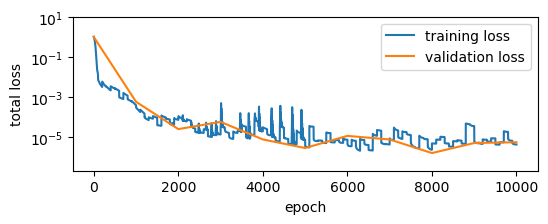

solution and errors:



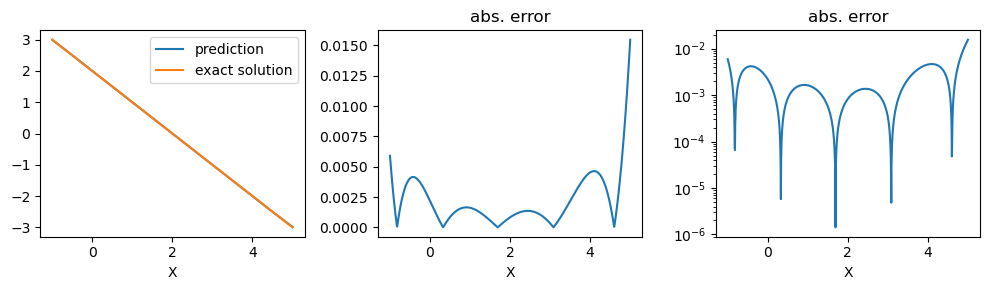

In [5]:
train_model_gauss_ESM(N, mu, sigma)

### Implicit Score Matching (ISM)

#### Derivation from ESM

Recall:
$$
\begin{align}
L_{ESM}(\theta) &= E_{p(X)}\|s_{\theta}(X) - \nabla_X \log p(X)\|^2\\
&= E_{p(X)}\left(\|s_{\theta}(X)\|^2 + 2\nabla_X \cdot s_{\theta}(X)\right)+E_{p(X)}\|\nabla_X \log p(X)\|^2.
\end{align}
$$
and 
$$
\begin{align}
\tilde{\theta} &= \text{argmin}_{\theta}L_{ESM}(\theta) = E_{p(X)}\|s_{\theta}(X) - \nabla_X \log p(X)\|^2\\ &=\text{argmin}_{\theta}L_{ISM}(\theta)=E_{p(X)}\left(\|s_{\theta}(X)\|^2 + 2\nabla_X \cdot s_{\theta}(X)\right).
\end{align}
$$
But one should be aware that
$$
L_{ESM}(\tilde{\theta}) = 0 = L_{ISM}(\tilde{\theta})+E_{p(X)}\|\nabla_X \log p(X)\|^2.
$$

---

* Derivation
    $$
    \begin{align}
    E_{p(X)}\|\nabla_X \log p(X)\|^2 &= \int_X p(X)\|\nabla_X \log p(X)\|^2\,dX\\
    &= \int_X p(X)\nabla_X \log p(X) \cdot \nabla_X \log p(X)\,dX\\
    &= \int_X \nabla_X p(X) \cdot \nabla_X \log p(X)\,dX\\
    &= -\int_X  p(X) \Delta_X \log p(X)\,dX\\
    &= - E_{p(X)} \left[\Delta_X \log p(X)\right].
    \end{align}
    $$
* For 1D Gaussian
    $$
    E_{p(X)}\|\nabla_X \log p(X)\|^2 = - E_{p(X)} \left[\frac{-1}{\sigma^2}\right] = \frac{1}{\sigma^2}.
    $$

---

#### ISM Loss function
$$
L_{ISM}(\theta) = E_{p(X)}\left(\|s_{\theta}(X)\|^2 + 2\nabla_X \cdot s_{\theta}(X)\right).
$$

* For 1D Gaussian, if the exact solution is found we should have
$$
L_{ISM}(\theta) = -\frac{1}{\sigma^2}.
$$

model =  Plain(
  (ln1): Linear(in_features=1, out_features=10, bias=True)
  (act): Sigmoid()
  (ln2): Linear(in_features=10, out_features=1, bias=True)
)
Number of paramters: 31

Strat training

Adam optimizer, re-sample every  100.0  steps

Iter     0, Loss_Train: 1.04478e-01, Loss_Valid: 1.04815e-01
Iter  1000, Loss_Train: -1.05571e+00, Loss_Valid: -1.01595e+00
Iter  2000, Loss_Train: -1.05208e+00, Loss_Valid: -9.47693e-01
Iter  3000, Loss_Train: -9.72880e-01, Loss_Valid: -9.87219e-01
Iter  4000, Loss_Train: -9.58105e-01, Loss_Valid: -9.93974e-01
change learning rate to 0.001
Iter  5000, Loss_Train: -1.06491e+00, Loss_Valid: -1.01688e+00
Iter  6000, Loss_Train: -1.00375e+00, Loss_Valid: -9.33169e-01
Iter  7000, Loss_Train: -9.78544e-01, Loss_Valid: -9.52736e-01
change learning rate to 0.0001
Iter  8000, Loss_Train: -9.97291e-01, Loss_Valid: -9.21776e-01
Iter  9000, Loss_Train: -1.08229e+00, Loss_Valid: -9.78922e-01
Iter 10000, Loss_Train: -9.55396e-01, Loss_Valid: -9.95683e-01

Evol

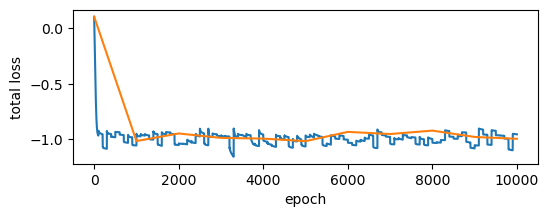

solution and errors:



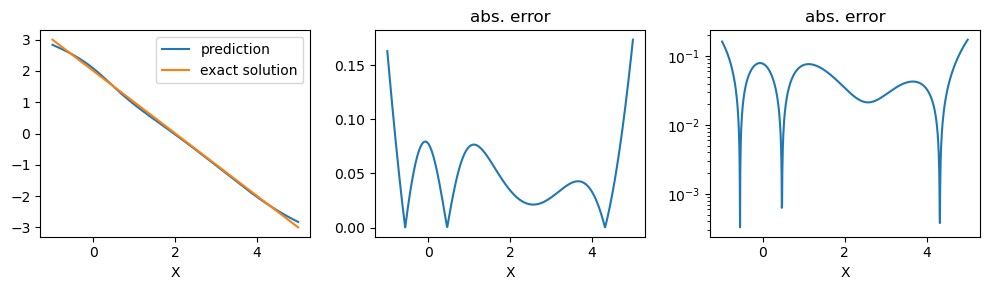

In [6]:
train_model_gauss_ISM(N, mu, sigma)

### Denoising Score Matching (DSM)

* Noise function
$$
\tilde{X}_t = X_0 + tz, \quad z\sim \mathcal{N}(0, 1).
$$
Assuming that the noise function has the p.d.f. $p_t(\tilde{X})$ and score function $s_t(\tilde{X})$, i.e., 
$$
\tilde{X}_t \sim p_t(\tilde{X}), \quad s_t(\tilde{X}) = \nabla_{\tilde{X}} \log p_t(\tilde{X}).
$$

The explicit score matching of the noise function gives
$$
L_{ESM} = E_{\tilde{X}\sim p_t(\tilde{X})}\|s_{\theta}(\tilde{X}_t) - \nabla_{\tilde{X}} \log p_t(\tilde{X})\|^2.
$$

Ideally, if $t\ll 1$, we should have $s(X)\approx s_t(\tilde{X})$.

---

* Observation 1: the score function of the conditional p.d.f. can be calculated explicitly as
$$
\nabla_{\tilde{X}} \log p_t(\tilde{X}|X_0) = -\frac{\tilde{X}-X_0}{t^2} = -\frac{z}{t}.
$$
* Observation 2: $L_{ESM}$ can be re-written as
$$
\begin{align}
L_{ESM}=& E_{X_0\sim p_0(X_0)}E_{\tilde{X}|X_0\sim p_t(\tilde{X}|X_0)}\left\|s_{\theta}(\tilde{X}_t) - \nabla_{\tilde{X}} \log p_t(\tilde{X}|X_0)\right\|^2 \\
&+ E_{\tilde{X}\sim p_t(\tilde{X})}\|\nabla_{\tilde{X}} \log p_t(\tilde{X})\|^2-E_{X_0\sim p_0(X_0)}E_{\tilde{X}|X_0\sim p_t(\tilde{X}|X_0)}\left\|\nabla_{\tilde{X}} \log p_t(\tilde{X}|X_0)\right\|^2\\
=& E_{X_0\sim p_0(X_0)}E_{\tilde{X}|X_0\sim p_t(\tilde{X}|X_0)}\left\|s_{\theta}(\tilde{X}_t)+ \frac{z}{t}\right\|^2\\
&+ E_{\tilde{X}\sim p_t(\tilde{X})}\|\nabla_{\tilde{X}} \log p_t(\tilde{X})\|^2-E_{X_0\sim p_0(X_0)}E_{\tilde{X}|X_0\sim p_t(\tilde{X}|X_0)}\left\|\nabla_{\tilde{X}} \log p_t(\tilde{X}|X_0)\right\|^2
\end{align}
$$

#### Loss function

$$
L_{DSM}(\theta)= E_{X\sim p(X)}E_{\tilde{X}|X\sim p_t(\tilde{X}|X)}\left\|t\,s_{\theta}(\tilde{X}, t) + z\right\|^2.
$$

But one should be aware that
$$
\begin{align}
L_{ESM}(\tilde{\theta}) = 0 = & \frac{1}{t^2} L_{DSM}(\tilde{\theta})\\
&+ E_{\tilde{X}\sim p_t(\tilde{X})}\|\nabla_{\tilde{X}} \log p_t(\tilde{X})\|^2-E_{X_0\sim p_0(X_0)}E_{\tilde{X}|X_0\sim p_t(\tilde{X}|X_0)}\left\|\nabla_{\tilde{X}} \log p_t(\tilde{X}|X_0)\right\|^2.
\end{align}
$$

---

model =  Plain(
  (ln1): Linear(in_features=1, out_features=10, bias=True)
  (act): Sigmoid()
  (ln2): Linear(in_features=10, out_features=1, bias=True)
)
Number of paramters: 31

Strat training

Adam optimizer, re-sample every  100.0  steps

Iter     0, Loss_Res: 9.71012e-01, Loss_Valid: 9.44937e-01
Iter  1000, Loss_Res: 8.03676e-01, Loss_Valid: 7.61922e-01
Iter  2000, Loss_Res: 8.39092e-01, Loss_Valid: 8.44841e-01
Iter  3000, Loss_Res: 7.94427e-01, Loss_Valid: 8.64535e-01
Iter  4000, Loss_Res: 7.86804e-01, Loss_Valid: 7.98978e-01
change learning rate to 0.001
Iter  5000, Loss_Res: 7.80284e-01, Loss_Valid: 8.48441e-01
Iter  6000, Loss_Res: 8.00071e-01, Loss_Valid: 8.04066e-01
Iter  7000, Loss_Res: 8.07990e-01, Loss_Valid: 8.46709e-01
change learning rate to 0.0001
Iter  8000, Loss_Res: 8.18913e-01, Loss_Valid: 7.79441e-01
Iter  9000, Loss_Res: 8.49074e-01, Loss_Valid: 7.79666e-01
Iter 10000, Loss_Res: 8.67314e-01, Loss_Valid: 7.90866e-01

Evolution of loss



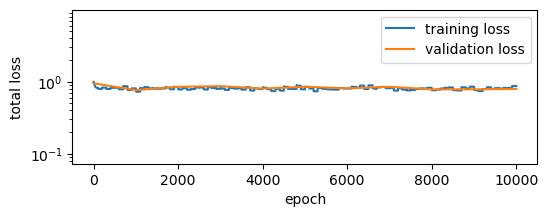

solution and errors:



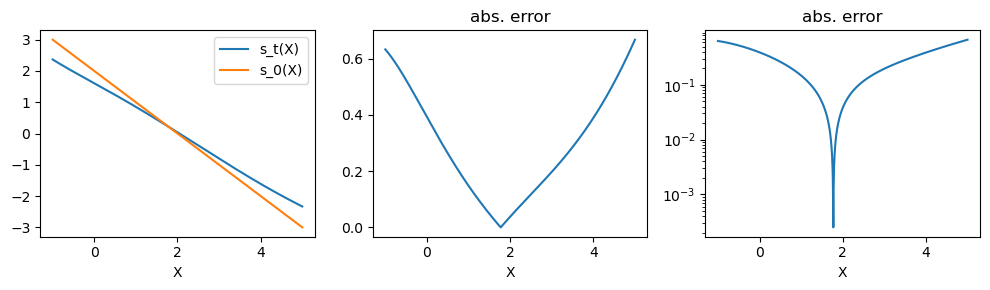

In [7]:
# t = 0.5
train_model_DSM(N, mu, sigma, 0.5)

model =  Plain(
  (ln1): Linear(in_features=1, out_features=10, bias=True)
  (act): Sigmoid()
  (ln2): Linear(in_features=10, out_features=1, bias=True)
)
Number of paramters: 31

Strat training

Adam optimizer, re-sample every  100.0  steps

Iter     0, Loss_Res: 9.93893e-01, Loss_Valid: 9.91726e-01
Iter  1000, Loss_Res: 9.09187e-01, Loss_Valid: 9.32155e-01
Iter  2000, Loss_Res: 9.15667e-01, Loss_Valid: 8.81390e-01
Iter  3000, Loss_Res: 9.75513e-01, Loss_Valid: 9.24404e-01
Iter  4000, Loss_Res: 9.01383e-01, Loss_Valid: 9.78701e-01
change learning rate to 0.001
Iter  5000, Loss_Res: 8.30786e-01, Loss_Valid: 9.38765e-01
Iter  6000, Loss_Res: 9.12143e-01, Loss_Valid: 8.61597e-01
Iter  7000, Loss_Res: 9.26348e-01, Loss_Valid: 8.99376e-01
change learning rate to 0.0001
Iter  8000, Loss_Res: 8.62626e-01, Loss_Valid: 9.24266e-01
Iter  9000, Loss_Res: 9.66846e-01, Loss_Valid: 9.32199e-01
Iter 10000, Loss_Res: 8.86329e-01, Loss_Valid: 9.17018e-01

Evolution of loss



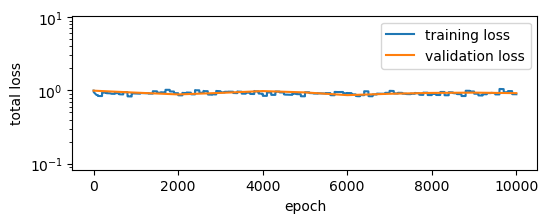

solution and errors:



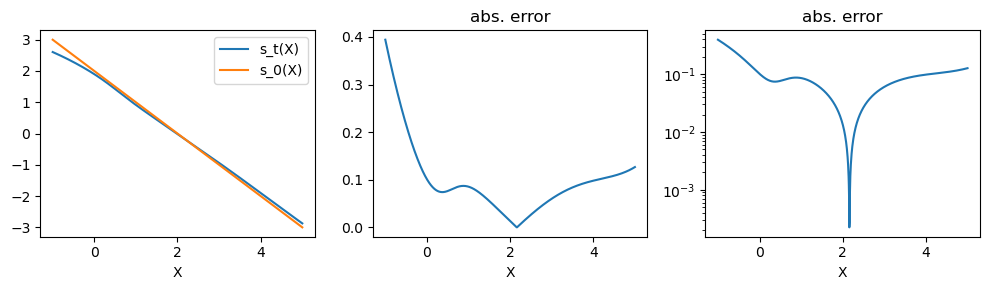

In [8]:
# t = 0.3
train_model_DSM(N, mu, sigma, 0.3)

model =  Plain(
  (ln1): Linear(in_features=1, out_features=10, bias=True)
  (act): Sigmoid()
  (ln2): Linear(in_features=10, out_features=1, bias=True)
)
Number of paramters: 31

Strat training

Adam optimizer, re-sample every  100.0  steps

Iter     0, Loss_Res: 9.91724e-01, Loss_Valid: 1.03923e+00
Iter  1000, Loss_Res: 1.07277e+00, Loss_Valid: 8.76302e-01
Iter  2000, Loss_Res: 1.01212e+00, Loss_Valid: 9.76511e-01
Iter  3000, Loss_Res: 9.41103e-01, Loss_Valid: 9.53670e-01
Iter  4000, Loss_Res: 9.07211e-01, Loss_Valid: 1.09207e+00
change learning rate to 0.001
Iter  5000, Loss_Res: 9.17532e-01, Loss_Valid: 1.01637e+00
Iter  6000, Loss_Res: 9.93995e-01, Loss_Valid: 1.01848e+00
Iter  7000, Loss_Res: 9.85076e-01, Loss_Valid: 1.04365e+00
change learning rate to 0.0001
Iter  8000, Loss_Res: 1.06491e+00, Loss_Valid: 1.05539e+00
Iter  9000, Loss_Res: 9.86552e-01, Loss_Valid: 1.00641e+00
Iter 10000, Loss_Res: 9.38333e-01, Loss_Valid: 9.85743e-01

Evolution of loss



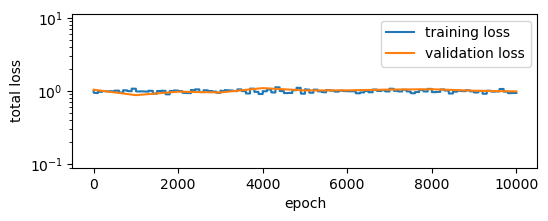

solution and errors:



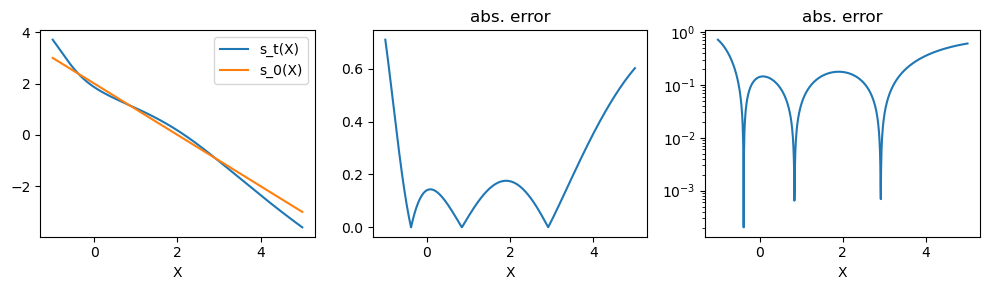

In [9]:
# t = 0.1
train_model_DSM(N, mu, sigma, 0.1)

<!-- * For 1D Gaussian, $X_0\sim\mathcal{N}(\mu, \sigma^2)$, it can be shown easily that $\tilde{X}\sim\mathcal{N}(\mu, t^2+\sigma^2)$. Therefore,
$$
E_{\tilde{X}\sim p_t(\tilde{X})}\|\nabla_{\tilde{X}} \log p_t(\tilde{X})\|^2=-E_{\tilde{X}\sim p_t(\tilde{X})}[\Delta_{\tilde{X}} \log p_t(\tilde{X})] = \frac{1}{t^2+\sigma^2},
$$
and
$$
E_{X_0\sim p_0(X_0)}E_{\tilde{X}|X_0\sim p_t(\tilde{X}|X_0)}\left\|\nabla_{\tilde{X}} \log p_t(\tilde{X}|X_0)\right\|^2=E_{X_0\sim p_0(X_0)}E_{\tilde{X}|X_0\sim p_t(\tilde{X}|X_0)}\left\|\frac{z}{t}\right\|^2
$$ -->

model =  Plain(
  (ln1): Linear(in_features=2, out_features=10, bias=True)
  (act): Sigmoid()
  (ln2): Linear(in_features=10, out_features=1, bias=True)
)
Number of paramters: 41

Strat training

Adam optimizer, re-sample every  100.0  steps

Iter     0, Loss_Res: 1.10805e+00, Loss_Valid: 1.19299e+00
Iter  1000, Loss_Res: 8.20566e-01, Loss_Valid: 8.11615e-01
Iter  2000, Loss_Res: 7.49049e-01, Loss_Valid: 8.58931e-01
Iter  3000, Loss_Res: 7.65321e-01, Loss_Valid: 8.18115e-01
Iter  4000, Loss_Res: 6.86895e-01, Loss_Valid: 7.72758e-01
change learning rate to 0.001
Iter  5000, Loss_Res: 7.22748e-01, Loss_Valid: 8.69851e-01
Iter  6000, Loss_Res: 8.04489e-01, Loss_Valid: 8.39196e-01
Iter  7000, Loss_Res: 7.88786e-01, Loss_Valid: 8.00373e-01
change learning rate to 0.0001
Iter  8000, Loss_Res: 8.12521e-01, Loss_Valid: 8.17261e-01
Iter  9000, Loss_Res: 8.00647e-01, Loss_Valid: 8.43757e-01
Iter 10000, Loss_Res: 8.05850e-01, Loss_Valid: 7.29655e-01

Evolution of loss



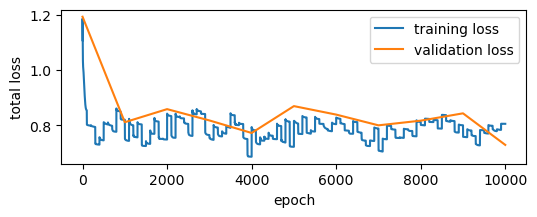

solution and errors:

t =  0.0


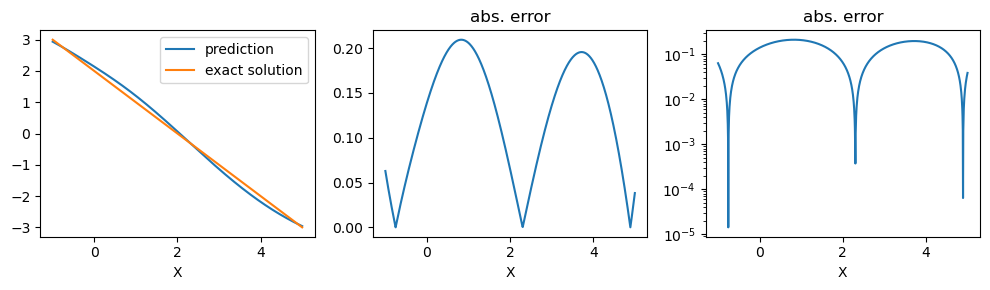

t =  0.1


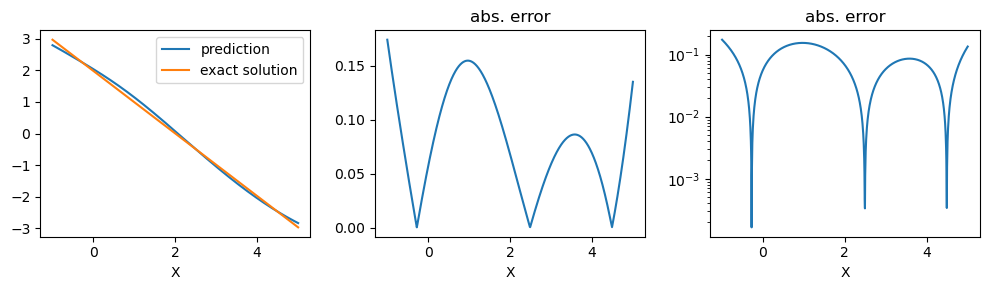

t =  1.0


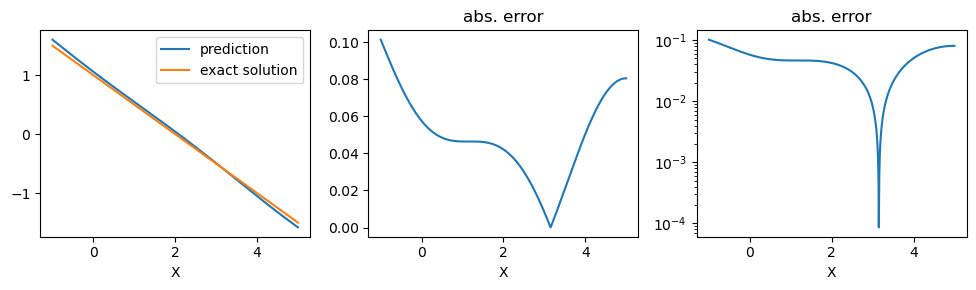

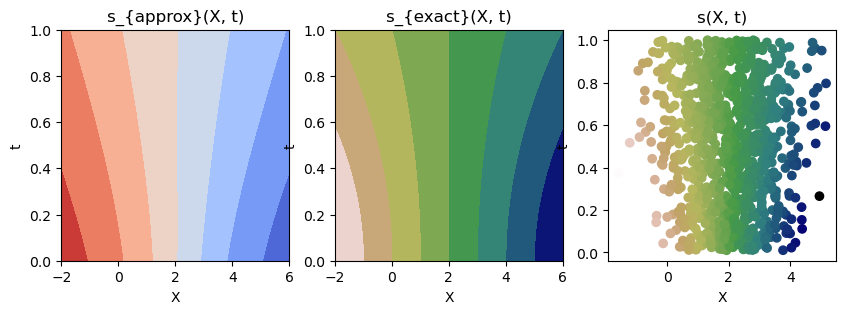

In [10]:
train_model_gauss_DSM(N, mu, sigma)